<a href="https://colab.research.google.com/github/Anshul-ARK/Lab_ds/blob/main/ds_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#starting from scratch
import seaborn as sns
df = sns.load_dataset('titanic')

In [2]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
180,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False


In [3]:
abs_freq = [0,0,0]
mp = {'Third': 2,'Second': 1,'First': 0}
for i in df['class']:
    abs_freq[mp[i]] += 1;
#so this is just for calculating the number of people who belong to which class

In [4]:
for i in range(0,3,1):
  print(abs_freq[i])

216
184
491


In [5]:
df.shape
df['class'].isnull().sum()
#from this i can understand that there are no null values in this data set

np.int64(0)

In [6]:
cum_freq = abs_freq
relative_freq = abs_freq
for i in range(1,3,1):
  cum_freq[i] += cum_freq[i-1]
for i in range(0,3,1):
  relative_freq[i] /= cum_freq[2]
# print("")
for i,values in mp.items():
  print(r'                     ' + i,end = " ")
print("")
print("Absolute frequencys",end = "    ")
for i in range(2,-1,-1):
  print(abs_freq[i],end = "        ")
print("")
print("Cummulative frequencys",end = " ")
for i in range(2,-1,-1):
  print(cum_freq[i],end = "        ")
print("")
print("Relative frequencys",end = "    ")
for i in range(2,-1,-1):
  print(relative_freq[i],end = "        ")
print("")

                     Third                      Second                      First 
Absolute frequencys    1.0        0.4489337822671156        0.24242424242424243        
Cummulative frequencys 1.0        0.4489337822671156        0.24242424242424243        
Relative frequencys    1.0        0.4489337822671156        0.24242424242424243        


In [7]:
#check for the null values inside the surviours list
df['survived'].isnull().sum()
#as we have zero null values inside we can use the data

np.int64(0)

In [8]:
df['sex'].isnull().sum()

np.int64(0)

In [9]:
import pandas as pd
table = pd.crosstab(df['sex'],df['survived'])
print(table)

survived    0    1
sex               
female     81  233
male      468  109


In [10]:
# Task 3: Compute the Following Probabilities:
# 1. Joint Probability: P(Sex = female, Survived = 1)
# 2. Marginal Probability:
# o P(Sex = female)
# o P(Survived = 1)
# 3. Conditional Probability:
# o P(Survived = 1 | Sex = female)
# o P(Sex = female | Survived = 1)



In [11]:
#calculating the joint probability for the p(Sex = female,survived = 1)
val1 = 233/(233 + 81 + 468 + 109)
print(val1)


0.2615039281705948


In [12]:
val2 = (233 + 81)/(233 + 81 + 468 + 109)
print(val2)
#this is for calculating the marginal probability p(sex = female)

0.35241301907968575


In [13]:
# p(survived = 1 | sex = female)
# p(sex = female,survived = 1)/p(sex = female)
val3 = val1/val2
print(val3)

0.7420382165605095


In [14]:
#calculate sur = 1
val4 = (233 + 109)/(233 + 81 + 468 + 109)
print(val1/val4)

0.6812865497076023


In [15]:
#check for the missing values in both fare and the age column
df['age'].isnull().sum()

np.int64(177)

In [16]:
df['fare'].isnull().sum()

np.int64(0)

In [17]:
df.dropna(subset=['age'], inplace=True)
#droped the values

In [18]:
df['age'].isnull().sum()

np.int64(0)

In [19]:
corr_matrix = df[['age','fare']].corr()

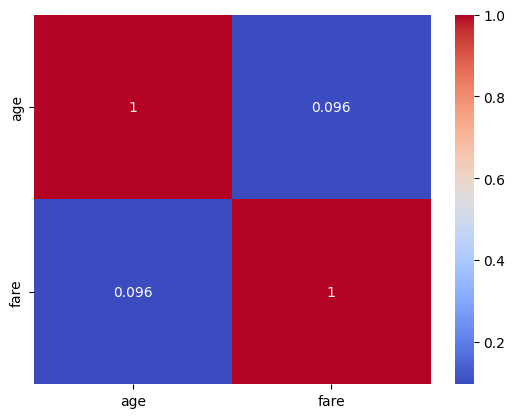

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
#interpretation of the above data
#i can see that corelation is positive so both so if one increase other also increases
#it is not very strong corelation as it is just 0.09 so it is

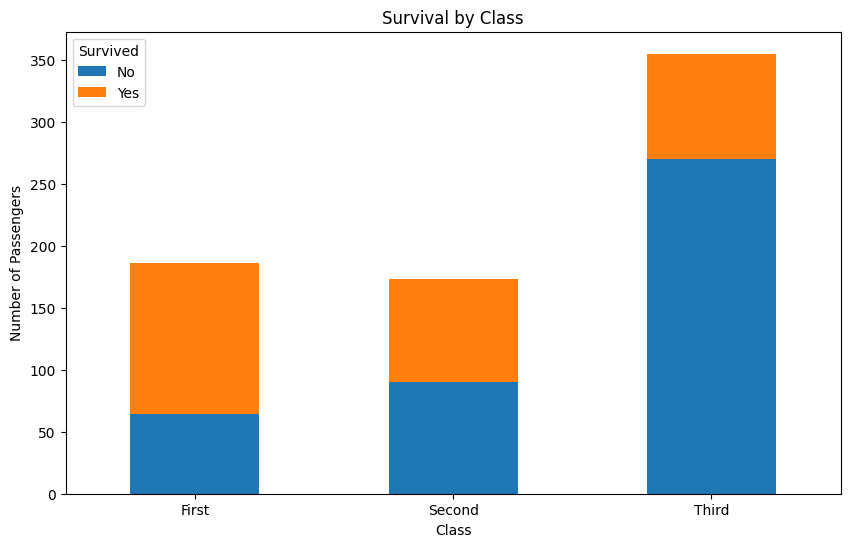

In [22]:
import matplotlib.pyplot as plt

class_survived = pd.crosstab(df['class'], df['survived'])
class_survived.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add title and labels
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])

# Show the plot
plt.show()

In [23]:
#observation is that in third class many people died
#many people survived in the first class